# Code Exiobase_EU_ETS_2 by Martínez-Hernando


This information is necessary in Python, for activate the funtions 
If they are not installed is necessary to do it, write pip install XXXXX. If pip doesn't work put pip3, or pip3.11 (search on internet)

Activate generical information

In [55]:
import pandas as pd #To real CSV and dataframes
import numpy as np #To work with matrix
from scipy import io, integrate, linalg, signal #Google told me, I don´t know what is it
from scipy.sparse.linalg import cg, eigs #Google told me, I don´t know what is it

To create list

In [56]:
from typing import List, Tuple, Dict, Callable, Iterable, Union

 # To use pymrio

In [57]:
import pymrio as mr

Folder

In [58]:
exiobase_folder="P:/Universidad/Exiobase/EU ETS tesis/"

# Supply chains

Platinum

In [59]:
#country_metal_1=input('Which country is doing metallurgy in chain 1? ISO-2 code')
mining='Precious metal ores and concentrates'
metal='Precious metals'


impact_metal_1t=pd.read_csv(exiobase_folder + 'platino_rec.txt', delimiter='\t', header=[0], index_col=[0,1])
impact_metal_1t.index.names=["region","sector"]

impact_mining_1=impact_metal_1t.copy()
impact_mining_1.loc[impact_mining_1.index.get_level_values("sector") != mining, :] = 0
impact_metal_1=impact_metal_1t.copy()
impact_metal_1.loc[impact_metal_1.index.get_level_values("sector") == mining, :] = 0


In [60]:
impact_metal_1t

CO2  \
region sector                                                            
ZA     Electricity by coal                                12676.439230   
       Electricity by coal                                  221.466614   
       Electricity by hydro                                   0.000000   
       Electricity by hydro                                   0.000000   
       Electricity by nuclear                                 0.000000   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)           0.000000   
       Recreational, cultural and sporting services (92)      0.000368   
       Other services (93)                                    0.000107   
       Private households with employed persons (95)          0.000000   
       Extra-territorial organizations and bodies             0.000000   

                                                               N2O       CH4  
region sector                                                                 
ZA     Electricity by coal                                0.166858  0.122965  
       Electricity by coal                                0.003298  0.002084  
       Electricity by hydro                               0.000000  0.064327  
       Electricity by hydro                               0.000000  0.018607  
       Electricity by nuclear                             0.000000  0.000000  
...                                                            ...       ...  
WM     Membership organisation services n.e.c. (91)       0.000000  0.000000  
       Recreational, cultural and sporting services (92)  0.000000  0.000000  
       Other services (93)                                0.000000  0.000000  
       Private households with employed persons (95)      0.000000  0.000000  
       Extra-territorial organizations and bodies         0.000000  0.000000  

[9715 rows x 3 columns]

Lithium

In [61]:
#country_metal_2=input('Which country is doing metallurgy in chain 2? ISO-2 code')
mining='Precious metal ores and concentrates'
metal='Other non-ferrous metal products'

impact_metal_2t=pd.read_csv(exiobase_folder + 'litio_port.txt', delimiter='\t', header=[0], index_col=[0,1])
impact_metal_2t.index.names=["region","sector"]

impact_mining_2=impact_metal_2t.copy()
impact_mining_2.loc[impact_mining_2.index.get_level_values("sector") != mining, :] = 0
impact_metal_2=impact_metal_2t.copy()
impact_metal_2.loc[impact_metal_2.index.get_level_values("sector") == mining, :] = 0

Rubber

In [62]:
metal='Rubber and plastic products (25)'

impact_metal_3t=pd.read_csv(exiobase_folder + 'caucho_esp.txt', delimiter='\t', header=[0], index_col=[0,1])
impact_metal_3t.index.names=["region","sector"]

impact_mining_3=np.zeros_like(impact_metal_3t)
impact_metal_3=impact_metal_3t.copy()

# Calculation of equivalent emissions

Obtain transport emissions

In [63]:
climate_change_metal_1=impact_metal_1.T
impact_boats_c_metal_1=climate_change_metal_1.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_1=climate_change_metal_1.xs("Other land transportation services", level="sector", axis=1)


climate_change_metal_2=impact_metal_2.T
impact_boats_c_metal_2=climate_change_metal_2.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_2=climate_change_metal_2.xs("Other land transportation services", level="sector", axis=1)

climate_change_metal_3=impact_metal_3.T
impact_boats_c_metal_3=climate_change_metal_3.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_3=climate_change_metal_3.xs("Other land transportation services", level="sector", axis=1)



climate_change_metal=[ climate_change_metal_1.T, climate_change_metal_2.T, climate_change_metal_3.T]

impact_boats_c_metal=[impact_boats_c_metal_1, impact_boats_c_metal_2, impact_boats_c_metal_3]
impact_trucks_c_metal=[impact_trucks_c_metal_1, impact_trucks_c_metal_2, impact_trucks_c_metal_3]


In [64]:
impact_boats_c_metal[1]

region,AT,BE,BG,CY,CZ,DE,DK,EE,ES,FI,...,CH,TR,NO,ID,ZA,WA,WL,WE,WF,WM
CO2,4.365130e-05,8.703970e-04,1.566920e-04,1.188154e-03,3.953080e-06,1.899610e-02,6.698050e-04,5.925750e-04,5.771510e-04,4.891720e-04,...,3.263580e-04,5.855000e-04,1.787403e-03,1.504270e-04,1.493010e-04,6.281417e-03,1.864881e-03,1.530961e-03,1.144600e-04,0.008444
N2O,7.448030e-10,1.484840e-08,2.705590e-09,1.902560e-08,6.951580e-11,3.221120e-07,1.161640e-08,1.027640e-08,1.036890e-08,8.389140e-09,...,5.627320e-09,1.028700e-08,3.213640e-08,3.573460e-09,2.574930e-09,1.103260e-07,3.229130e-08,2.610990e-08,2.767800e-09,0.000000
CH4,3.965800e-09,7.892360e-08,1.416570e-08,1.074880e-07,3.509240e-10,1.726150e-06,6.070980e-08,5.384460e-08,5.250010e-08,4.426940e-08,...,2.962550e-08,5.321900e-08,1.629890e-07,1.365280e-08,1.355440e-08,5.713480e-07,1.676130e-07,1.385540e-07,1.073770e-08,0.000000


In [65]:
CF_IPCC2007=np.array([1,298, 25])#IPCC 2007 CF (CO2, N2O, CH4)
CF_IPCC2007.shape

(3,)

## Boat transport

Only CO2

In [66]:
M_eq_boats_2_metal=pd.DataFrame()
for number in impact_boats_c_metal:
    M_eq_boats_2_metal_i=number.iloc[0] 
    M_eq_boats_2_metal=pd.concat([M_eq_boats_2_metal, M_eq_boats_2_metal_i], axis=1)
M_eq_boats_2_metal.columns=list(range(3))

CO2, N2O, CH4

In [67]:
M_eq_boats_3_metal=pd.DataFrame()
for number in impact_boats_c_metal:
    M_eq_boats_3_metal_i=CF_IPCC2007@number
    M_eq_boats_3_metal_i=pd.DataFrame(M_eq_boats_3_metal_i)
    M_eq_boats_3_metal_i.index=number.columns
    M_eq_boats_3_metal=pd.concat([M_eq_boats_3_metal, M_eq_boats_3_metal_i], axis=1)
M_eq_boats_3_metal.columns=list(range(3))

In [68]:
M_eq_boats_3_metal

,0,1,2
region,,,
AT,0.000384,4.397240e-05,5.596265e-08
BE,0.001601,8.767949e-04,3.278150e-05
BG,0.000148,1.578524e-04,1.270036e-06
CY,0.000082,1.196511e-03,9.762102e-06
CZ,0.000215,3.982569e-06,2.269797e-08
DE,0.004466,1.913524e-02,7.424558e-04
DK,0.000226,6.747844e-04,6.158344e-05
EE,0.000108,5.969835e-04,6.210361e-06
ES,0.001051,5.815534e-04,8.413521e-04


## Road transport

Only CO2

In [69]:
M_eq_trucks_2_metal=pd.DataFrame()
for number in impact_trucks_c_metal:
    M_eq_trucks_2_metal_i=number.iloc[0] 
    M_eq_trucks_2_metal=pd.concat([M_eq_trucks_2_metal, M_eq_trucks_2_metal_i], axis=1)
M_eq_trucks_2_metal.columns=list(range(3))

CO2, N2O, CH4

In [70]:
M_eq_trucks_3_metal=pd.DataFrame()
for number in impact_trucks_c_metal:
    M_eq_trucks_3_metal_i=CF_IPCC2007@number
    M_eq_trucks_3_metal_i=pd.DataFrame(M_eq_trucks_3_metal_i)
    M_eq_trucks_3_metal_i.index=number.columns
    M_eq_trucks_3_metal=pd.concat([M_eq_trucks_3_metal, M_eq_trucks_3_metal_i], axis=1)
M_eq_trucks_3_metal.columns=list(range(3))

In [71]:
M_eq_trucks_2_metal

,0,1,2
AT,55.345563,0.000056,3.724450e-06
BE,204.014300,0.000136,1.951360e-05
BG,22.356658,0.000099,2.043990e-06
CY,11.272552,0.000037,4.610720e-07
CZ,39.357581,0.000172,1.278610e-05
DE,389.099841,0.000104,1.564880e-05
DK,90.595439,0.000091,6.196180e-06
EE,13.646622,0.000054,9.150690e-07
ES,398.895243,0.000026,1.085894e-03
FI,114.827818,0.000032,4.942910e-07


# Figures

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams['font.family']='Times New Roman' #I prefere this font, you can change it
plt.rcParams['font.size']=16

In [73]:
chain=input('Which chain do you want to calculate? (WL+CN, PL+PL, etc.). Number of chain: ')

if chain == '1':
        print('Platinum')
        print('Year 2022')
        impact_mining=impact_mining_1
        impact_metal_=impact_metal_1
        impact_metal_t=impact_metal_1t
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,0]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,0]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,0]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,0]
elif chain == '2':
        print('Lithium')
        impact_mining=impact_mining_2
        impact_metal=impact_metal_2
        impact_metal_t=impact_metal_2t
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,1]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,1]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,1]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,1]
elif chain == '3':
        print('Rubber')
        impact_mining=impact_mining_3
        impact_metal=impact_metal_3
        impact_metal_t=impact_metal_3t
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,2]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,2]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,2]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,2]

else:
    print('You have to choose 1 2 or 3')

Platinum
Year 2022


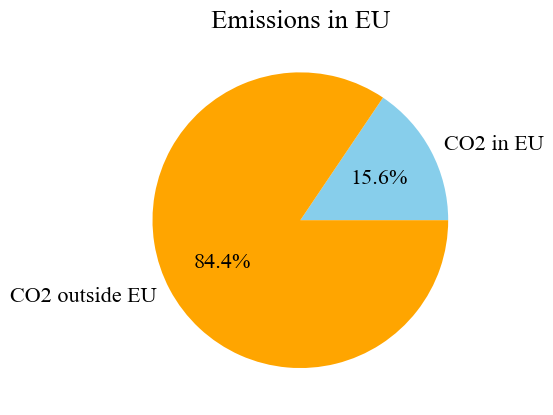

In [74]:
eu_countries=['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK'] #List of EU countries
climate_change=impact_metal_t['CO2']
impact_country=climate_change.groupby(level='region').sum().T
non_eu_countries=[idx for idx in impact_country.index if idx not in eu_countries]
impact_eu=0
impact_non_eu=0
for i, region in impact_country.items():
    if i in eu_countries:
        impact_eu=impact_eu+impact_country.loc[i]
    else:
        impact_non_eu=impact_non_eu+impact_country.loc[i]

impact_total=[impact_eu, impact_non_eu]
names=['CO2 in EU', 'CO2 outside EU']

plt.pie(impact_total, labels=names, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Emissions in EU')
plt.show()


## Cost of CO2

For price of CO2 non-EU have to been removed

In [ ]:
price_co2_2011=12.89 #Mean price of t of co2 in EU ETS in 2011 sendeco2 https://www.sendeco2.com/es/precios-co2
price_co2_2022=65.29 #Mean price of t of co2 in EU ETS in 2024 sendeco2 https://www.sendeco2.com/es/precios-co2
price_co2_2030=65.29 #Mean price of t of co2 in EU ETS in 2024 https://www.sendeco2.com/es/precios-co2
price_co2_v=[price_co2_2011, price_co2_2022, price_co2_2030, price_co2_2011, price_co2_2022, price_co2_2030, price_co2_2011, price_co2_2022, price_co2_2030]

Transport in metallurgy (including planes)

In [76]:
M_eq_planes_2_metal=pd.DataFrame()
for j in range(3):
    M_eq_planes_2_metal_i=climate_change_metal[j].xs("Air transport services (62)", level="sector", axis=0)
    M_eq_planes_2_metal_i=M_eq_planes_2_metal_i.iloc[:,0]
    M_eq_planes_2_metal=pd.concat([M_eq_planes_2_metal, M_eq_planes_2_metal_i], axis=1)
M_eq_planes_2_metal.columns=list(range(3))

In [77]:
M_eq_planes_2_metal

,0,1,2
AT,6.861010e-06,1.441600e-04,7.903310e-07
BE,3.219320e-05,3.423010e-04,3.481960e-06
BG,1.119660e-05,5.275510e-05,3.925360e-07
CY,1.419290e-05,2.948330e-05,2.065980e-07
CZ,1.108540e-05,1.725560e-04,1.477660e-06
DE,1.293939e-03,2.265020e-03,2.591260e-05
DK,2.496650e-06,1.455080e-04,1.597460e-06
EE,1.518690e-06,2.749880e-05,1.764890e-07
ES,9.675410e-06,1.441452e-03,8.066580e-04
FI,6.645120e-07,3.460350e-04,3.127450e-06


In [78]:
Cost_boats_2_metal=pd.DataFrame()
Cost_boats_3_metal=pd.DataFrame()  
Cost_trucks_2_metal=pd.DataFrame()  
Cost_trucks_3_metal=pd.DataFrame() 
Cost_planes_2_metal=pd.DataFrame()
alpha=input('Are EU countries? (y/n)').lower()

for j in range(9):
    Cost_boats_2_metal_i=[]
    Cost_boats_3_metal_i=[]
    Cost_trucks_2_metal_i=[]
    Cost_trucks_3_metal_i=[]
    Cost_planes_2_metal_i=[]

    price_co2=price_co2_v[j]
    
    if alpha=='y':
        if j<3:
            metal=0
            k_p=0.025
            k_t=0.59
            k_b=0.82
        elif j<6:
            metal=1
            k_p=0.01
            k_t=0.203
            k_b=0.093
        else:
            metal=2
            k_p=0.061
            k_t=0.229
            k_b=0.23
    else:
        if j<3:
            metal=0
            k_p=0.001
            k_t=0.061
            k_b=0.17
        elif j<6:
            metal=1
            k_p=0
            k_t=0
            k_b=0
        else:
            metal=2
            k_p=0
            k_t=0
            k_b=0

    for i, region in impact_boats_c_metal[metal].items():
        if i in eu_countries:
            Boats_2=(1-k_b)*M_eq_boats_2_metal.loc[i,metal]*price_co2/2+k_b*M_eq_boats_2_metal.loc[i,metal]*price_co2
            Boats_3=(1-k_b)*M_eq_boats_3_metal.loc[i,metal]*price_co2/2+k_b*M_eq_boats_3_metal.loc[i,metal]*price_co2
            Trucks_2=M_eq_trucks_2_metal.loc[i,metal]*price_co2*k_t
            Trucks_3=M_eq_trucks_3_metal.loc[i,metal]*price_co2*k_t
            Planes_2=M_eq_planes_2_metal.loc[i,metal]*price_co2*k_p
        else:
            Boats_2=0
            Boats_3=0
            Trucks_2=0
            Trucks_3=0
            Planes_2=0
        Cost_boats_2_metal_i.append(float(Boats_2))
        Cost_boats_3_metal_i.append(float(Boats_3))
        Cost_trucks_2_metal_i.append(float(Trucks_2))
        Cost_trucks_3_metal_i.append(float(Trucks_3))
        Cost_planes_2_metal_i.append(float(Planes_2))

    Cost_boats_2_metal_i=pd.DataFrame(Cost_boats_2_metal_i)
    Cost_boats_3_metal_i=pd.DataFrame(Cost_boats_3_metal_i)
    Cost_trucks_2_metal_i=pd.DataFrame(Cost_trucks_2_metal_i)
    Cost_trucks_3_metal_i=pd.DataFrame(Cost_trucks_3_metal_i)
    Cost_planes_2_metal_i=pd.DataFrame(Cost_planes_2_metal_i)
    Cost_boats_2_metal=pd.concat([Cost_boats_2_metal, Cost_boats_2_metal_i], axis=1)
    Cost_boats_3_metal=pd.concat([Cost_boats_3_metal, Cost_boats_3_metal_i], axis=1)
    Cost_trucks_2_metal=pd.concat([Cost_trucks_2_metal, Cost_trucks_2_metal_i], axis=1)
    Cost_trucks_3_metal=pd.concat([Cost_trucks_3_metal, Cost_trucks_3_metal_i], axis=1)
    Cost_planes_2_metal=pd.concat([Cost_planes_2_metal, Cost_planes_2_metal_i], axis=1)

In [79]:
Cost_boats_3_metal_sum=Cost_boats_3_metal.sum(axis=0)
Cost_planes_2_metal_sum=Cost_planes_2_metal.sum(axis=0)
Cost_trucks_2_metal_sum=Cost_trucks_2_metal.sum(axis=0)

In [80]:
Cost_planes_2_metal_sum

0    0.000539
0    0.002731
0    0.002731
0    0.001422
0    0.007200
0    0.007200
0    0.000736
0    0.003726
0    0.003726
dtype: float64

Other cost: electricity

In [81]:
electricity=["Electricity by coal", "Electricity by gas", "Electricity by nuclear", "Electricity by hydro", "Electricity by wind", "Electricity by petroleum and other oil derivatives", "Electricity by biomass and waste", "Electricity by solar photovoltaic", "Electricity by solar thermal", "Electricity by tide, wave, ocean", "Electricity by Geothermal", "Electricity nec"]
for i in electricity: 
    print(i)

Electricity by coal
Electricity by gas
Electricity by nuclear
Electricity by hydro
Electricity by wind
Electricity by petroleum and other oil derivatives
Electricity by biomass and waste
Electricity by solar photovoltaic
Electricity by solar thermal
Electricity by tide, wave, ocean
Electricity by Geothermal
Electricity nec


In [82]:
len(climate_change_metal)

3

In [83]:
M_eq_electricity=pd.DataFrame()
electricity=["Electricity by coal", "Electricity by gas", "Electricity by nuclear", "Electricity by hydro", "Electricity by wind", "Electricity by petroleum and other oil derivatives", "Electricity by biomass and waste", "Electricity by solar photovoltaic", "Electricity by solar thermal", "Electricity by tide, wave, ocean", "Electricity by Geothermal", "Electricity nec"]
for j in range(3):
    M_eq_electricity_j=pd.DataFrame()
    M_eq_electricity_i=pd.DataFrame()
    for i in electricity: 
        M_eq_electricity_ij=climate_change_metal[j].xs(i, level="sector", axis=0)
        M_eq_electricity_ij=M_eq_electricity_ij.iloc[:,0]
        M_eq_electricity_ij= M_eq_electricity_ij.groupby(level="region").sum()
        M_eq_electricity_j=pd.concat([M_eq_electricity_j,M_eq_electricity_ij], axis=1)
    
    M_eq_electricity_i=M_eq_electricity_j.sum(axis=1)
    M_eq_electricity=pd.concat([M_eq_electricity, M_eq_electricity_i], axis=1)

M_eq_electricity.columns=list(range(3))

In [84]:
M_eq_electricity_ij


region
AT    0.000000e+00
AU    0.000000e+00
BE    0.000000e+00
BG    0.000000e+00
BR    0.000000e+00
CA    0.000000e+00
CH    0.000000e+00
CN    0.000000e+00
CY    0.000000e+00
CZ    0.000000e+00
DE    0.000000e+00
DK    0.000000e+00
EE    0.000000e+00
ES    0.000000e+00
FI    0.000000e+00
FR    0.000000e+00
GB    0.000000e+00
GR    0.000000e+00
HR    0.000000e+00
HU    0.000000e+00
ID    0.000000e+00
IE    0.000000e+00
IN    0.000000e+00
IT    0.000000e+00
JP    0.000000e+00
KR    0.000000e+00
LT    0.000000e+00
LU    0.000000e+00
LV    0.000000e+00
MT    0.000000e+00
MX    0.000000e+00
NL    0.000000e+00
NO    0.000000e+00
PL    0.000000e+00
PT    0.000000e+00
RO    0.000000e+00
RU    0.000000e+00
SE    0.000000e+00
SI    0.000000e+00
SK    0.000000e+00
TR    0.000000e+00
US    0.000000e+00
WA    8.759420e-10
WE    0.000000e+00
WF    0.000000e+00
WL    0.000000e+00
WM    0.000000e+00
ZA    0.000000e+00
Name: CO2, dtype: float64

In [85]:
Cost_electricity=pd.DataFrame()

for j in range(9):
    Cost_electricity_i=[]
    price_co2=price_co2_v[j]
    if j<3:
        metal=0
    elif j<6:
        metal=1
    else:
        metal=2
    
    for i, region in M_eq_electricity[metal].items():
        if i in eu_countries: 
            if j<3:
                Electricity_2=M_eq_electricity.loc[i,metal]*price_co2
            else:
                if alpha=='y':
                    Electricity_2=M_eq_electricity.loc[i,metal]*price_co2
                else:
                    Electricity_2=0      
        else:
            Electricity_2=0

        Cost_electricity_i.append(float(Electricity_2))

    Cost_electricity_i=pd.DataFrame(Cost_electricity_i)

    Cost_electricity=pd.concat([Cost_electricity, Cost_electricity_i], axis=1)
Cost_electricity.index=M_eq_electricity.index
Cost_electricity.columns=list(range(9))

In [86]:
Cost_electricity_sum=Cost_electricity.sum(axis=0)

In [87]:
Cost_electricity_sum

0    1321.960961
1    6695.952768
2    6695.952768
3       1.092470
4       5.533544
5       5.533544
6       1.282327
7       6.495198
8       6.495198
dtype: float64

Other cost: direct emissions

In [88]:
M_eq_direct=pd.DataFrame()
category=["Precious metals", "Other non-ferrous metal products", "Rubber and plastic products (25)"]
for j in range(3):
    M_eq_direct_i=climate_change_metal[j].xs(category[j], level="sector", axis=0)
    M_eq_direct_i=M_eq_direct_i.iloc[:,0]
    M_eq_direct_i= M_eq_direct_i.groupby(level="region").sum()
    M_eq_direct=pd.concat([M_eq_direct, M_eq_direct_i], axis=1)
M_eq_direct.columns=list(range(3))

In [89]:
Cost_direct=pd.DataFrame()
for j in range(9):

    Cost_direct_i=[]
    price_co2=price_co2_v[j]
    if j<3:
        metal=0
        countries=["ZA", "RU","DE","US"]
    elif j<6:
        metal=1
        countries=["CN","AU","WL","PT"]
    else:
        metal=2
        countries=["WA","WF","WL","ES"]
        price_co2=0
    
    suma_ini=0
    for k in range(4):
        if countries[k] in eu_countries:
            Direct_2=M_eq_direct.loc[countries[k],metal]*price_co2
        else:
            Direct_2=0
        suma_ini+=Direct_2+suma_ini
        
    Direct_2=suma_ini
    Cost_direct_i.append(float(Direct_2))

    Cost_direct_i=pd.DataFrame(Cost_direct_i)

    Cost_direct=pd.concat([Cost_direct, Cost_direct_i], axis=1)

Cost_direct.columns=list(range(9))

In [90]:
Cost_direct_sum=Cost_direct.sum(axis=0)

In [91]:
Cost_direct_sum

0    12.248075
1    62.038541
2    62.038541
3     0.000595
4     0.003015
5     0.003015
6     0.000000
7     0.000000
8     0.000000
dtype: float64

Other cost: other sectors emissions (aluminium)

In [92]:
M_eq_alum=pd.DataFrame()
for j in range(3):
    M_eq_alum_i=climate_change_metal[j].xs("Aluminium and aluminium products", level="sector", axis=0)
    M_eq_alum_i=M_eq_alum_i.iloc[:,0]
    M_eq_alum=pd.concat([M_eq_alum, M_eq_alum_i], axis=1)
M_eq_alum.columns=list(range(3))

In [93]:
Cost_alum=pd.DataFrame()

for j in range(9):

    Cost_alum_i=[]
    price_co2=price_co2_v[j]
    if j<3:
        metal=0
        countries=["ZA", "RU","DE","US"]
    elif j<6:
        metal=1
        countries=["CN","AU","WL","PT"]
    else:
        metal=2
        countries=["WA","WF","WL","ES"]
    
    suma_ini=0
    for k in range(4):
        if countries[k] in eu_countries:
            Alum_2=M_eq_alum.loc[countries[k],metal]*price_co2
        else:
            Alum_2=0
        suma_ini+=Alum_2+suma_ini
    
    Alum_2=suma_ini
    Cost_alum_i.append(float(Alum_2))

    Cost_alum_i=pd.DataFrame(Cost_alum_i)

    Cost_alum=pd.concat([Cost_alum, Cost_alum_i], axis=1)

Cost_alum.columns=list(range(9))

In [94]:
Cost_alum_sum=Cost_alum.sum(axis=0)

In [95]:
Cost_alum_sum

0    0.053281
1    0.269875
2    0.269875
3    0.000000
4    0.000000
5    0.000000
6    0.000057
7    0.000287
8    0.000287
dtype: float64

Other cost: other sectors emissions (CBAM)

In [96]:
M_eq_other_metals_cbam=pd.DataFrame()
other_metals_cbam=["Basic iron and steel and of ferro-alloys and first products thereof","Cement, lime and plaster"]
for j in range(3):
    M_eq_other_metals_cbam_j=pd.DataFrame()
    M_eq_other_metals_cbam_i=pd.DataFrame()
    for i in other_metals_cbam: 
        M_eq_other_metals_cbam_ij=climate_change_metal[j].xs(i, level="sector", axis=0)
        M_eq_other_metals_cbam_ij=M_eq_other_metals_cbam_ij.iloc[:,0]
        M_eq_other_metals_cbam_ij= M_eq_other_metals_cbam_ij.groupby(level="region").sum()
        M_eq_other_metals_cbam_j=pd.concat([M_eq_other_metals_cbam_j,M_eq_other_metals_cbam_ij], axis=1)

    M_eq_other_metals_cbam_i=M_eq_other_metals_cbam_j.sum(axis=1)
    M_eq_other_metals_cbam=pd.concat([M_eq_other_metals_cbam, M_eq_other_metals_cbam_i], axis=1)

M_eq_other_metals_cbam.columns=list(range(3))

In [97]:
Cost_other_metals_cbam=pd.DataFrame()

for j in range(9):

    Cost_other_metals_cbam_i=[]
    price_co2=price_co2_v[j]

    if j<3:
        metal=0
        countries=["ZA", "RU","DE","US"]
    elif j<6:
        metal=1
        countries=["CN","AU","WL","PT"]
    else:
        metal=2
        countries=["WA","WF","WL","ES"]
    
    suma_ini=0
    for k in range(4):
        if countries[k] in eu_countries:
            Other_metals_cbam_2=M_eq_other_metals_cbam.loc[countries[k],metal]*price_co2
        else:
            Other_metals_cbam_2=0
        suma_ini+=Other_metals_cbam_2+suma_ini

    Other_metals_cbam_2=suma_ini
    Cost_other_metals_cbam_i.append(float(Other_metals_cbam_2))

    Cost_other_metals_cbam_i=pd.DataFrame(Cost_other_metals_cbam_i)

    Cost_other_metals_cbam=pd.concat([Cost_other_metals_cbam, Cost_other_metals_cbam_i], axis=1)

Cost_other_metals_cbam.columns=list(range(9))

In [98]:
Cost_other_sectors_cbam_sum=Cost_other_metals_cbam.sum(axis=0)

In [99]:
Cost_other_sectors_cbam_sum

0    0.031759
1    0.160867
2    0.160867
3    0.000750
4    0.003801
5    0.003801
6    0.010002
7    0.050664
8    0.050664
dtype: float64

Other cost: other sectors emissions (no CBAM)

In [100]:
M_eq_other_metals=pd.DataFrame()
other_metals=[ "Copper products","Lead, zinc and tin and products thereof"]
for j in range(3):
    M_eq_other_metals_j=pd.DataFrame()
    M_eq_other_metals_i=pd.DataFrame()
    for i in other_metals: 
        M_eq_other_metals_ij=climate_change_metal[j].xs(i, level="sector", axis=0)
        M_eq_other_metals_ij=M_eq_other_metals_ij.iloc[:,0]
        M_eq_other_metals_ij= M_eq_other_metals_ij.groupby(level="region").sum()
        M_eq_other_metals_j=pd.concat([M_eq_other_metals_j,M_eq_other_metals_ij], axis=1)

    M_eq_other_metals_i=M_eq_other_metals_j.sum(axis=1)
    M_eq_other_metals=pd.concat([M_eq_other_metals, M_eq_other_metals_i], axis=1)

M_eq_other_metals.columns=list(range(3))

In [101]:
Cost_other_metals=pd.DataFrame()
for j in range(9):

    Cost_other_metals_i=[]
    price_co2=price_co2_v[j]

    if j<3:
        metal=0
        countries=["ZA", "RU","DE","US"]
    elif j<6:
        metal=1
        countries=["CN","AU","WL","PT"]
    else:
        metal=2
        countries=["WA","WF","WL","ES"]
    suma_ini=0 
    for k in range(4):
        if countries[k] in eu_countries:
            Other_metals_2=M_eq_other_metals.loc[countries[k],metal]*price_co2
        else:
            Other_metals_2=0
        suma_ini+=Other_metals_2+suma_ini
    Other_metals_2=suma_ini
    Cost_other_metals_i.append(float(Other_metals_2))

    Cost_other_metals_i=pd.DataFrame(Cost_other_metals_i)

    Cost_other_metals=pd.concat([Cost_other_metals, Cost_other_metals_i], axis=1)

Cost_other_metals.columns=list(range(9))

In [102]:
Cost_other_sectors_sum=Cost_other_metals.sum(axis=0)

In [103]:
Cost_other_sectors_sum

0    0.036784
1    0.186315
2    0.186315
3    0.000061
4    0.000308
5    0.000308
6    0.000075
7    0.000381
8    0.000381
dtype: float64

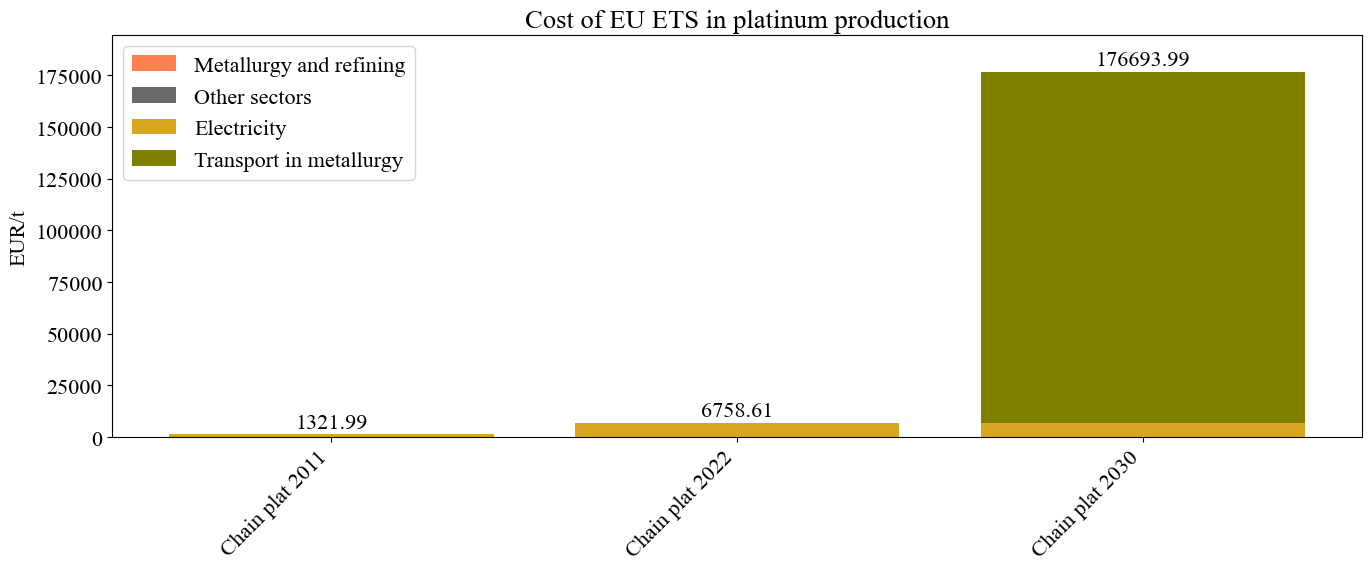

In [104]:
Cost_plat_2011=0
Cost_lit_2011=0
Cost_rub_2011=0
Cost_plat_2011_other=Cost_other_sectors_cbam_sum.iloc[0]
Cost_lit_2011_other=Cost_other_sectors_cbam_sum.iloc[3]
Cost_rub_2011_other=Cost_other_sectors_cbam_sum.iloc[6]
Cost_plat_2011_electricity=Cost_electricity_sum.iloc[0]
Cost_lit_2011_electricity=Cost_electricity_sum.iloc[3]
Cost_rub_2011_electricity=Cost_electricity_sum.iloc[6]


Cost_plat_2022_trans_metal=Cost_planes_2_metal_sum.iloc[1]
Cost_lit_2022_trans_metal=Cost_planes_2_metal_sum.iloc[4]
Cost_rub_2022_trans_metal=Cost_planes_2_metal_sum.iloc[7]
Cost_plat_2022_direct=Cost_direct_sum.iloc[1]
Cost_lit_2022_direct=Cost_direct_sum.iloc[4]
Cost_rub_2022_direct=Cost_direct_sum.iloc[7]
Cost_plat_2022_other=Cost_other_sectors_cbam_sum.iloc[1]+Cost_alum_sum.iloc[1]+Cost_other_sectors_sum.iloc[1]
Cost_lit_2022_other=Cost_other_sectors_cbam_sum.iloc[4]+Cost_alum_sum.iloc[4]+Cost_other_sectors_sum.iloc[4]
Cost_rub_2022_other=Cost_other_sectors_cbam_sum.iloc[7]+Cost_alum_sum.iloc[7]+Cost_other_sectors_sum.iloc[7]
Cost_plat_2022_electricity=Cost_electricity_sum.iloc[1]
Cost_lit_2022_electricity=Cost_electricity_sum.iloc[4]
Cost_rub_2022_electricity=Cost_electricity_sum.iloc[7]


Cost_plat_2030_trans_metal=Cost_boats_3_metal_sum.iloc[2]+Cost_trucks_2_metal_sum.iloc[2]+Cost_planes_2_metal_sum.iloc[2]
Cost_lit_2030_trans_metal=Cost_boats_3_metal_sum.iloc[5]+Cost_trucks_2_metal_sum.iloc[5]+Cost_planes_2_metal_sum.iloc[5]
Cost_rub_2030_trans_metal=Cost_boats_3_metal_sum.iloc[8]+Cost_trucks_2_metal_sum.iloc[8]+Cost_planes_2_metal_sum.iloc[8]
Cost_plat_2030_direct=Cost_direct_sum.iloc[2]
Cost_lit_2030_direct=Cost_direct_sum.iloc[5]
Cost_rub_2030_direct=Cost_direct_sum.iloc[8]
Cost_plat_2030_other=Cost_other_sectors_cbam_sum.iloc[2]+Cost_alum_sum.iloc[2]+Cost_other_sectors_sum.iloc[2]
Cost_lit_2030_other=Cost_other_sectors_cbam_sum.iloc[5]+Cost_alum_sum.iloc[5]+Cost_other_sectors_sum.iloc[5]
Cost_rub_2030_other=Cost_other_sectors_cbam_sum.iloc[8]+Cost_alum_sum.iloc[8]+Cost_other_sectors_sum.iloc[8]
Cost_plat_2030_electricity=Cost_electricity_sum.iloc[2]
Cost_lit_2030_electricity=Cost_electricity_sum.iloc[5]
Cost_rub_2030_electricity=Cost_electricity_sum.iloc[8]  


Cost_electricity=[Cost_plat_2011_electricity, Cost_plat_2022_electricity, Cost_plat_2030_electricity, Cost_lit_2011_electricity, Cost_lit_2022_electricity, Cost_lit_2030_electricity, Cost_rub_2011_electricity, Cost_rub_2022_electricity, Cost_rub_2030_electricity]
Cost_direct=[Cost_plat_2011, Cost_plat_2022_direct, Cost_plat_2030_direct, Cost_lit_2011, Cost_lit_2022_direct, Cost_lit_2030_direct, Cost_rub_2011, Cost_rub_2022_direct, Cost_rub_2030_direct]
Cost_other=[Cost_plat_2011_other, Cost_plat_2022_other, Cost_plat_2030_other, Cost_lit_2011_other, Cost_lit_2022_other, Cost_lit_2030_other, Cost_rub_2011_other, Cost_rub_2022_other, Cost_rub_2030_other]
Cost_trans_metal=[0, Cost_plat_2022_trans_metal, Cost_plat_2030_trans_metal, 0, Cost_lit_2022_trans_metal, Cost_lit_2030_trans_metal, 0, Cost_rub_2022_trans_metal, Cost_rub_2030_trans_metal]

total_sum=[electricity + direct + other + metal for electricity, direct, other, metal in zip(Cost_electricity[0:3], Cost_direct[0:3], Cost_other[0:3], Cost_trans_metal[0:3])]
labels=['Chain plat 2011', 'Chain plat 2022', 'Chain plat 2030']

fig, ax = plt.subplots(figsize=(14, 6))
bars1=ax.bar(labels, Cost_direct[0:3] , label='Metallurgy and refining', color='coral')
bars2=ax.bar(labels, Cost_other[0:3], bottom=Cost_direct[0:3], label='Other sectors', color='dimgray')
bars3=ax.bar(labels, Cost_electricity[0:3], bottom=np.array(Cost_other[0:3])+np.array(Cost_direct[0:3]), label='Electricity', color='goldenrod')
bars5=ax.bar(labels, Cost_trans_metal[0:3], bottom=np.array(Cost_electricity[0:3])+np.array(Cost_other[0:3])+np.array(Cost_direct[0:3]), label='Transport in metallurgy', color='olive')

for i, (total, label) in enumerate(zip(total_sum, labels)):
    if label.strip()!='' and total not in (0, None):
        ax.text(i, total+0.005*max(total_sum), str(round(total, 2)), ha='center', va='bottom', color='black')

    
ax.legend()
ax.set_ylim(0, max(total_sum)*1.1)
plt.ylabel('EUR/t')
plt.title('Cost of EU ETS in platinum production')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas 45 grados
plt.tight_layout()           
plt.show()

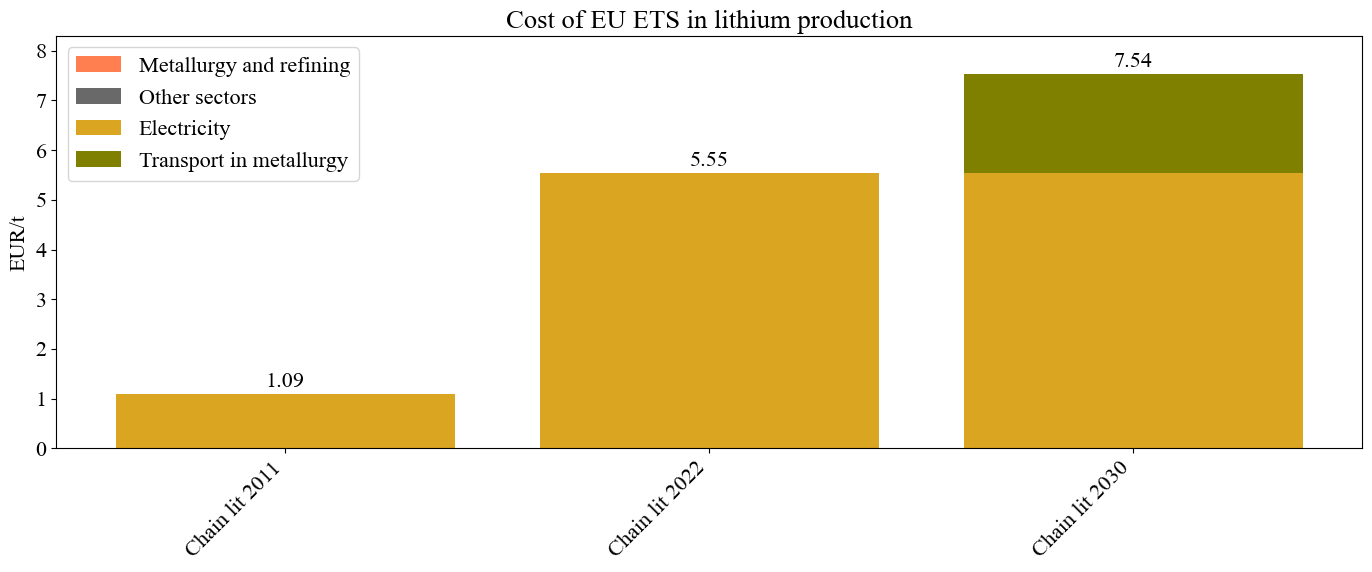

In [105]:
total_sum=[electricity + direct + other + metal for electricity, direct, other, metal in zip(Cost_electricity[3:6], Cost_direct[3:6], Cost_other[3:6], Cost_trans_metal[3:6])]
labels=['Chain lit 2011', 'Chain lit 2022', 'Chain lit 2030']

fig, ax = plt.subplots(figsize=(14, 6))
bars1=ax.bar(labels, Cost_direct[3:6] , label='Metallurgy and refining', color='coral')
bars2=ax.bar(labels, Cost_other[3:6], bottom=Cost_direct[3:6], label='Other sectors', color='dimgray')
bars3=ax.bar(labels, Cost_electricity[3:6], bottom=np.array(Cost_other[3:6])+np.array(Cost_direct[3:6]), label='Electricity', color='goldenrod')
bars5=ax.bar(labels, Cost_trans_metal[3:6], bottom=np.array(Cost_electricity[3:6])+np.array(Cost_other[3:6])+np.array(Cost_direct[3:6]), label='Transport in metallurgy', color='olive')

for i, (total, label) in enumerate(zip(total_sum, labels)):
    if label.strip()!='' and total not in (0, None):
        ax.text(i, total+0.005*max(total_sum), str(round(total, 2)), ha='center', va='bottom', color='black')

    
ax.legend()
ax.set_ylim(0, max(total_sum)*1.1)
plt.ylabel('EUR/t')
plt.title('Cost of EU ETS in lithium production')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas 45 grados
plt.tight_layout()           
plt.show()

In [106]:
Cost_direct [6:9]

[0, 0.0, 0.0]

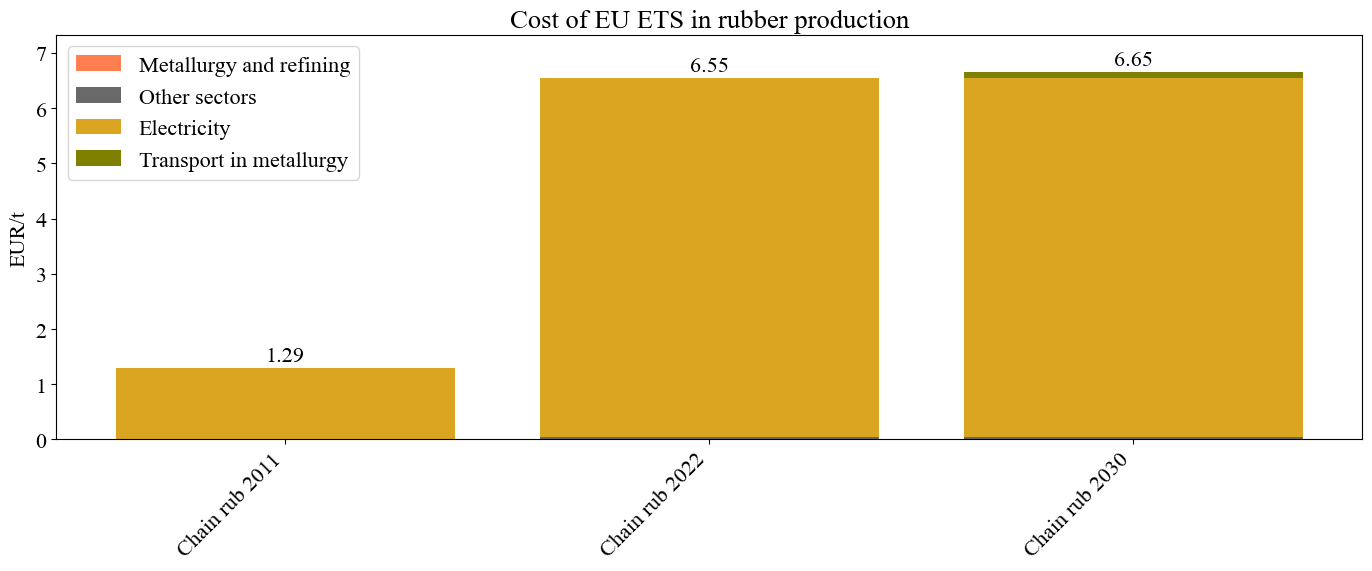

In [107]:
total_sum=[electricity + direct + other + metal for electricity, direct, other, metal in zip(Cost_electricity[6:9], Cost_direct[6:9], Cost_other[6:9], Cost_trans_metal[6:9])]
labels=['Chain rub 2011', 'Chain rub 2022', 'Chain rub 2030']

fig, ax = plt.subplots(figsize=(14, 6))
bars1=ax.bar(labels, Cost_direct [6:9], label='Metallurgy and refining', color='coral')
bars2=ax.bar(labels, Cost_other[6:9], bottom=Cost_direct[6:9], label='Other sectors', color='dimgray')
bars3=ax.bar(labels, Cost_electricity[6:9], bottom=np.array(Cost_other[6:9])+np.array(Cost_direct[6:9]), label='Electricity', color='goldenrod')
bars5=ax.bar(labels, Cost_trans_metal[6:9], bottom=np.array(Cost_electricity[6:9])+np.array(Cost_other[6:9])+np.array(Cost_direct[6:9]), label='Transport in metallurgy', color='olive')

for i, (total, label) in enumerate(zip(total_sum, labels)):
    if label.strip()!='' and total not in (0, None):
        ax.text(i, total+0.005*max(total_sum), str(round(total, 2)), ha='center', va='bottom', color='black')

    
ax.legend()
ax.set_ylim(0, max(total_sum)*1.1)
plt.ylabel('EUR/t')
plt.title('Cost of EU ETS in rubber production')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas 45 grados
plt.tight_layout()           
plt.show()

In [108]:
df = pd.DataFrame({
    'Cost_electricity': Cost_electricity,
    'Cost_direct': Cost_direct,
    'Cost_other': Cost_other,
    'Cost_trans_metal': Cost_trans_metal
})

# Exportar a CSV
df.to_csv('costs_data_eu.csv', index=False)